In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
Exp_data=pd.read_csv("E:\\10xAccademy_Practice\\Week 1\\Data\\OutlierRemved_telecoData_outliers.csv")
Exp_data.head(5)

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,14.416352,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,16.578971,14.732334,15.919515,16.083116,19.443428,16.478853,18.961518,15.991897,17.419642,19.548462
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,14.126741,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,16.823537,16.765813,16.724508,16.661996,20.226918,13.973120,20.082529,16.527230,17.800791,20.297677
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,14.124290,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,16.797431,16.503329,16.682716,15.634140,19.251782,12.888235,19.833356,15.254341,17.143551,19.449612
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,14.094285,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,16.878346,16.533289,16.454185,13.908948,20.499545,16.199650,20.434303,16.364743,17.584222,20.556064
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,13.900779,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,16.540705,16.757994,16.656025,12.936559,20.084052,15.076752,20.126718,16.448142,17.467280,20.159635


In [5]:
df=Exp_data.copy()

In [7]:
df.columns.tolist()

['bearer_id',
 'start',
 'start_ms',
 'end',
 'end_ms',
 'dur._(ms)',
 'imsi',
 'msisdn/number',
 'imei',
 'last_location_name',
 'avg_rtt_dl_(ms)',
 'avg_rtt_ul_(ms)',
 'avg_bearer_tp_dl_(kbps)',
 'avg_bearer_tp_ul_(kbps)',
 'tcp_dl_retrans._vol_(bytes)',
 'tcp_ul_retrans._vol_(bytes)',
 'dl_tp_<_50_kbps_(%)',
 '50_kbps_<_dl_tp_<_250_kbps_(%)',
 '250_kbps_<_dl_tp_<_1_mbps_(%)',
 'dl_tp_>_1_mbps_(%)',
 'ul_tp_<_10_kbps_(%)',
 '10_kbps_<_ul_tp_<_50_kbps_(%)',
 '50_kbps_<_ul_tp_<_300_kbps_(%)',
 'ul_tp_>_300_kbps_(%)',
 'http_dl_(bytes)',
 'http_ul_(bytes)',
 'activity_duration_dl_(ms)',
 'activity_duration_ul_(ms)',
 'dur._(ms).1',
 'handset_manufacturer',
 'handset_type',
 'nb_of_sec_with_125000b_<_vol_dl',
 'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
 'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
 'nb_of_sec_with_37500b_<_vol_ul',
 'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
 'nb_of_sec_with_6250b_<_vol_ul_<_37500b',
 'nb_of_sec_with_vol_dl_<_6250b',
 'nb_of_sec_with_vol_ul_<_1250b',
 'socia

# Check for Outlier using Boxplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='avg_rtt_ul_(ms)'>

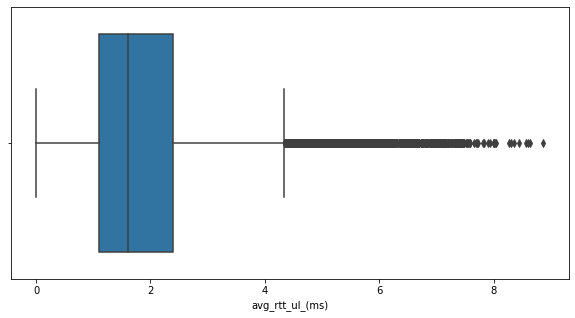

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(df["avg_rtt_ul_(ms)"], orient="vert")

In [ ]:
# From the above Plot there is a little outlier, so it may not affect our presentation
# next Extract those columns that carry ●	Average TCP retransmission, ●	Average RTT, ●	Handset type,
# and ●	Average throughput from the preprocessed data

In [21]:
#create A data frame that contains the required colums
UserExperiance_Df=df[["msisdn/number",
    "avg_rtt_dl_(ms)",
    "avg_rtt_ul_(ms)",
    "avg_bearer_tp_dl_(kbps)",
    "avg_bearer_tp_ul_(kbps)",
    "tcp_dl_retrans._vol_(bytes)",
    "tcp_ul_retrans._vol_(bytes)",
    "handset_type"]]
UserExperiance_Df.columns.tolist()

['msisdn/number',
 'avg_rtt_dl_(ms)',
 'avg_rtt_ul_(ms)',
 'avg_bearer_tp_dl_(kbps)',
 'avg_bearer_tp_ul_(kbps)',
 'tcp_dl_retrans._vol_(bytes)',
 'tcp_ul_retrans._vol_(bytes)',
 'handset_type']

In [22]:
# Find the Average value of Each Network Parameter
UserExperiance_Df['avg_rtt_total'] = UserExperiance_Df['avg_rtt_dl_(ms)'] + UserExperiance_Df['avg_rtt_ul_(ms)']
UserExperiance_Df['avg_bearer_tp_total'] = UserExperiance_Df['avg_bearer_tp_dl_(kbps)'] + UserExperiance_Df['avg_bearer_tp_ul_(kbps)']
UserExperiance_Df['avg_tcp_retrans_total'] = UserExperiance_Df['tcp_dl_retrans._vol_(bytes)'] + UserExperiance_Df['tcp_ul_retrans._vol_(bytes)']

C:\Users\HB\AppData\Local\Temp\ipykernel_27624\3157971574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UserExperiance_Df['avg_rtt_total'] = UserExperiance_Df['avg_rtt_dl_(ms)'] + UserExperiance_Df['avg_rtt_ul_(ms)']
C:\Users\HB\AppData\Local\Temp\ipykernel_27624\3157971574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UserExperiance_Df['avg_bearer_tp_total'] = UserExperiance_Df['avg_bearer_tp_dl_(kbps)'] + UserExperiance_Df['avg_bearer_tp_ul_(kbps)']
C:\Users\HB\AppData\Local\Temp\ipykernel_276

In [12]:
UserExperiance_Df.head()

,msisdn/number,avg_rtt_dl_(ms),avg_rtt_ul_(ms),avg_bearer_tp_dl_(kbps),avg_bearer_tp_ul_(kbps),tcp_dl_retrans._vol_(bytes),tcp_ul_retrans._vol_(bytes),handset_type,avg_rtt_total,avg_bearer_tp_total,avg_tcp_retrans_total
0,3.366496e+10,3.737670,1.609438,3.135494,3.784190,13.251161,9.94987,Samsung Galaxy A5 Sm-A520F,5.347108,6.919684,23.201031
1,3.368185e+10,4.174387,1.609438,2.772589,3.258097,13.251161,9.94987,Samsung Galaxy J5 (Sm-J530),5.783825,6.030685,23.201031
2,3.376063e+10,3.806662,1.609438,1.791759,2.197225,13.251161,9.94987,Samsung Galaxy A8 (2018),5.416100,3.988984,23.201031
3,3.375034e+10,3.806662,1.609438,3.784190,3.784190,13.251161,9.94987,undefined,5.416100,7.568379,23.201031
4,3.369980e+10,3.806662,1.609438,1.791759,2.197225,13.251161,9.94987,Samsung Sm-G390F,5.416100,3.988984,23.201031


In [13]:
UserExperiance_Df.isnull().sum()

msisdn/number                  0
avg_rtt_dl_(ms)                0
avg_rtt_ul_(ms)                0
avg_bearer_tp_dl_(kbps)        0
avg_bearer_tp_ul_(kbps)        0
tcp_dl_retrans._vol_(bytes)    0
tcp_ul_retrans._vol_(bytes)    0
handset_type                   0
avg_rtt_total                  0
avg_bearer_tp_total            0
avg_tcp_retrans_total          0
dtype: int64

In [16]:
UserExperiance_Df

,msisdn/number,avg_rtt_dl_(ms),avg_rtt_ul_(ms),avg_bearer_tp_dl_(kbps),avg_bearer_tp_ul_(kbps),tcp_dl_retrans._vol_(bytes),tcp_ul_retrans._vol_(bytes),handset_type,avg_rtt_total,avg_bearer_tp_total,avg_tcp_retrans_total
0,3.366496e+10,3.737670,1.609438,3.135494,3.784190,13.251161,9.94987,Samsung Galaxy A5 Sm-A520F,5.347108,6.919684,23.201031
1,3.368185e+10,4.174387,1.609438,2.772589,3.258097,13.251161,9.94987,Samsung Galaxy J5 (Sm-J530),5.783825,6.030685,23.201031
2,3.376063e+10,3.806662,1.609438,1.791759,2.197225,13.251161,9.94987,Samsung Galaxy A8 (2018),5.416100,3.988984,23.201031
3,3.375034e+10,3.806662,1.609438,3.784190,3.784190,13.251161,9.94987,undefined,5.416100,7.568379,23.201031
4,3.369980e+10,3.806662,1.609438,1.791759,2.197225,13.251161,9.94987,Samsung Sm-G390F,5.416100,3.988984,23.201031
...,...,...,...,...,...,...,...,...,...,...,...
149996,3.365069e+10,3.465736,-inf,3.951244,4.174387,13.251161,9.94987,Apple iPhone 8 Plus (A1897),-inf,8.125631,23.201031
149997,3.366345e+10,3.295837,0.693147,3.135494,3.988984,13.251161,9.94987,Apple iPhone Se (A1723),3.988984,7.124478,23.201031
149998,3.362189e+10,3.761200,1.791759,3.761200,3.850148,13.251161,9.94987,Apple iPhone Xs (A2097),5.552960,7.611348,23.201031
149999,3.361962e+10,3.610918,1.609438,3.526361,3.610918,13.251161,9.94987,Huawei Fig-Lx1,5.220356,7.137278,23.201031


# Find the Aggregate Value per customer 

In [17]:
UserExperiance_Df_agg = UserExperiance_Df.groupby('msisdn/number').agg({
    'avg_rtt_total': 'sum',
    'avg_bearer_tp_total': 'sum',
    'avg_tcp_retrans_total': 'sum',
    'handset_type': [lambda x: x.mode()[0]]})

UserExperiance_Df_agg.head(5)

,avg_rtt_total,avg_bearer_tp_total,avg_tcp_retrans_total,handset_type
,sum,sum,sum,<lambda>
msisdn/number,,,,
3.360100e+10,-inf,7.274480,23.201031,Huawei P20 Lite Huawei Nova 3E
3.360100e+10,3.401197,7.803027,23.201031,Apple iPhone 7 (A1778)
3.360100e+10,5.416100,7.763021,23.201031,undefined
3.360101e+10,6.942157,9.102310,16.921539,Apple iPhone 5S (A1457)
3.360101e+10,-inf,27.135851,49.213729,Apple iPhone Se (A1723)


In [23]:
# UserExperiance_Df_agg
UserExperiance_Df2 = pd.DataFrame()

In [24]:
UserExperiance_Df2["avg_rtt_total"] = UserExperiance_Df_agg["avg_rtt_total"]['sum']
UserExperiance_Df2["avg_tp_total"] = UserExperiance_Df_agg["avg_bearer_tp_total"]['sum']
UserExperiance_Df2["total_avg_tcp_total"] = UserExperiance_Df_agg["avg_tcp_retrans_total"]['sum']
UserExperiance_Df2["handset_type"] = UserExperiance_Df_agg["handset_type"]['<lambda>']
UserExperiance_Df2.head()

,avg_rtt_total,avg_tp_total,total_avg_tcp_total,handset_type
msisdn/number,,,,
3.360100e+10,-inf,7.274480,23.201031,Huawei P20 Lite Huawei Nova 3E
3.360100e+10,3.401197,7.803027,23.201031,Apple iPhone 7 (A1778)
3.360100e+10,5.416100,7.763021,23.201031,undefined
3.360101e+10,6.942157,9.102310,16.921539,Apple iPhone 5S (A1457)
3.360101e+10,-inf,27.135851,49.213729,Apple iPhone Se (A1723)


# Top 10 top TCP Retransmission

In [25]:
Top_10_TCP_retransmission = UserExperiance_Df.nlargest(10, 'avg_bearer_tp_total')['avg_bearer_tp_total']


In [33]:
# Bottom 10 TCP
Bottom_10_TCP = UserExperiance_Df.nsmallest(10, 'avg_bearer_tp_total')['avg_bearer_tp_total']
#Bottom_10_TCP.head(5)

In [29]:
Most_Frequent_TCP = UserExperiance_Df.value_counts('avg_bearer_tp_total').nlargest(10)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


[]

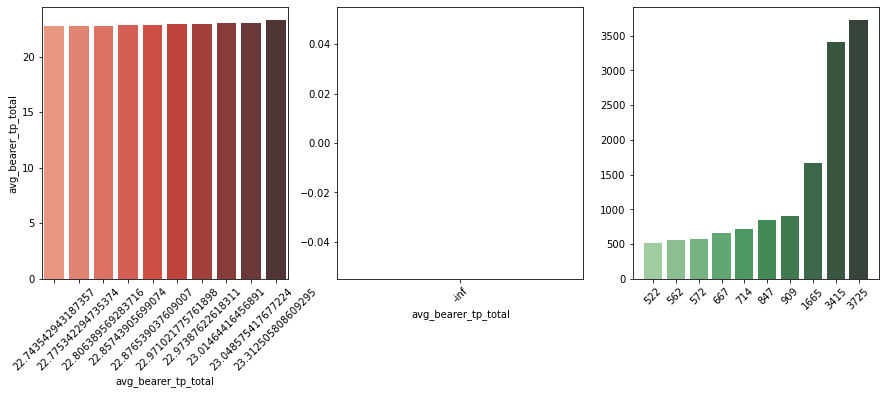

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
Top_10_TCP_retransmission1 = sns.barplot(data=Top_10_TCP_retransmission, x=Top_10_TCP_retransmission.index, orient='v', y=Top_10_TCP_retransmission, ax=axes[0], palette='Reds_d')
Bottom_10_TCP1 = sns.barplot(data=Bottom_10_TCP, x=Bottom_10_TCP.index,orient='v', y=Bottom_10_TCP.values, ax=axes[1], palette='Blues_d')
Most_Frequent_TCP1 = sns.barplot(data=Most_Frequent_TCP, x=Most_Frequent_TCP.index,orient='v', y=Most_Frequent_TCP.values, ax=axes[2], palette='Greens_d')
Top_10_TCP_retransmission1.set_xticklabels(Top_10_TCP_retransmission1.xaxis.get_majorticklabels(), rotation=45)
Bottom_10_TCP1.set_xticklabels(Bottom_10_TCP1.xaxis.get_majorticklabels(), rotation=45)
Most_Frequent_TCP1.set_xticklabels(Most_Frequent_TCP1.xaxis.get_majorticklabels(), rotation=45)
plt.plot()

# Per RTT VAlue

In [42]:
top_10_rtt = UserExperiance_Df.nlargest(10, 'avg_rtt_total')['avg_rtt_total']
bottom_10_rtt = UserExperiance_Df.nsmallest(10, 'avg_rtt_total')['avg_rtt_total']
most_frequent_rtt = UserExperiance_Df.value_counts('avg_rtt_total').nlargest(10)

# Produce Plots of RTT Values

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


[]

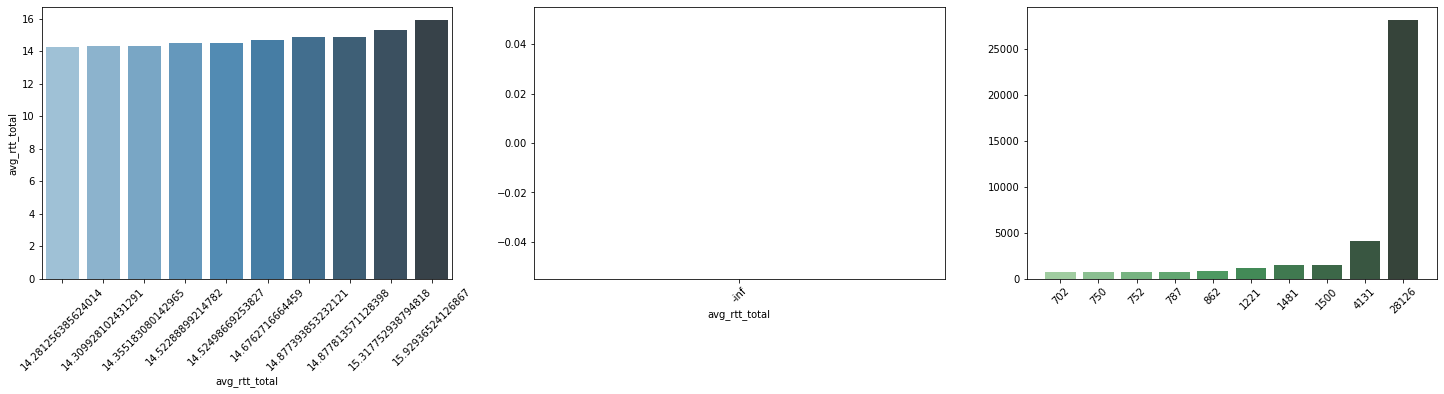

In [44]:
f, axes = plt.subplots(1, 3, figsize=(25, 5))
ax1 = sns.barplot(data=top_10_rtt, x=top_10_rtt.index, orient='v', y=top_10_rtt, ax=axes[0], palette='Blues_d')
ax2 = sns.barplot(data=bottom_10_rtt, x=bottom_10_rtt.index,orient='v', y=bottom_10_rtt.values, ax=axes[1], palette='Blues_d')
ax3 = sns.barplot(data=most_frequent_rtt, x=most_frequent_rtt.index,orient='v', y=most_frequent_rtt.values, ax=axes[2], palette='Greens_d')
ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(), rotation=45)
ax2.set_xticklabels(ax2.xaxis.get_majorticklabels(), rotation=45)
ax3.set_xticklabels(ax3.xaxis.get_majorticklabels(), rotation=45)
plt.plot()

# Average Throuput Value

In [45]:
top_10_retrans = UserExperiance_Df.nlargest(10, 'avg_tcp_retrans_total')['avg_rtt_total']
bottom_10_retrans = UserExperiance_Df.nsmallest(10, 'avg_tcp_retrans_total')['avg_rtt_total']
most_frequent_retrans = UserExperiance_Df.value_counts('avg_tcp_retrans_total').nlargest(10)


[]

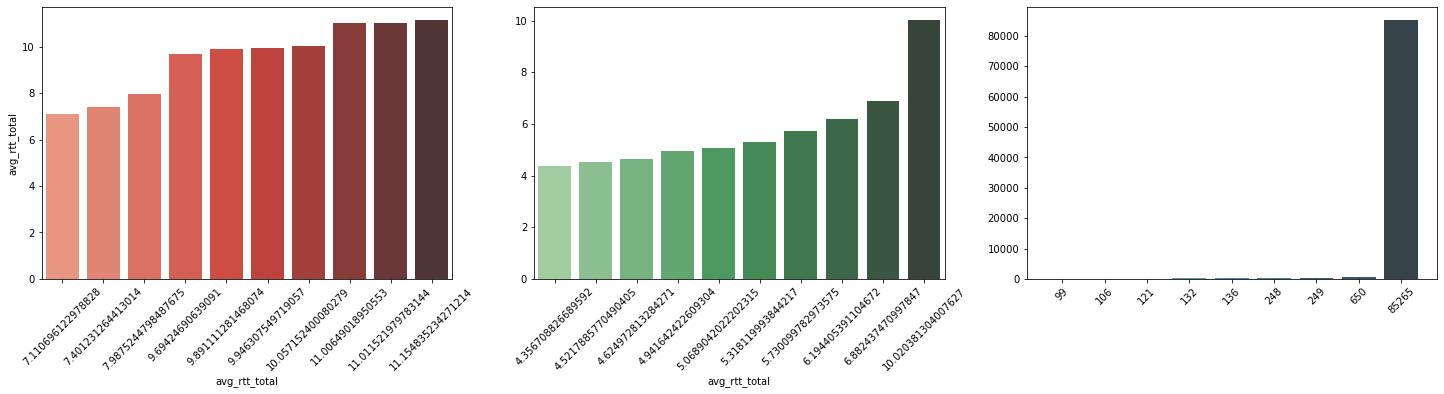

In [47]:
f, axes = plt.subplots(1, 3, figsize=(25, 5))
ax1 = sns.barplot(data=top_10_retrans, x=top_10_retrans.index, orient='v', y=top_10_retrans, ax=axes[0], palette='Reds_d')
ax2 = sns.barplot(data=bottom_10_retrans, x=bottom_10_retrans.index,orient='v', y=bottom_10_retrans.values, ax=axes[1], palette='Greens_d')
ax3 = sns.barplot(data=most_frequent_retrans, x=most_frequent_retrans.index,orient='v', y=most_frequent_retrans.values, ax=axes[2], palette='Blues_d')
ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(), rotation=45)
ax2.set_xticklabels(ax2.xaxis.get_majorticklabels(), rotation=45)
ax3.set_xticklabels(ax3.xaxis.get_majorticklabels(), rotation=45)
plt.plot()

# Distribution of the average throughput  per handset type 

In [48]:
HandsetType_Agg = UserExperiance_Df.groupby('handset_type').agg(
    {'avg_bearer_tp_total': 'mean', 'avg_tcp_retrans_total': 'mean'})
HandsetType_Agg.head()

,avg_bearer_tp_total,avg_tcp_retrans_total
handset_type,,
A-Link Telecom I. Cubot A5,15.838115,23.201031
A-Link Telecom I. Cubot Note Plus,13.931197,22.845643
A-Link Telecom I. Cubot Note S,15.094590,28.653651
A-Link Telecom I. Cubot Nova,17.237061,19.012167
A-Link Telecom I. Cubot Power,16.978497,14.450689


# The top Ten Handset types with higher average throuhput

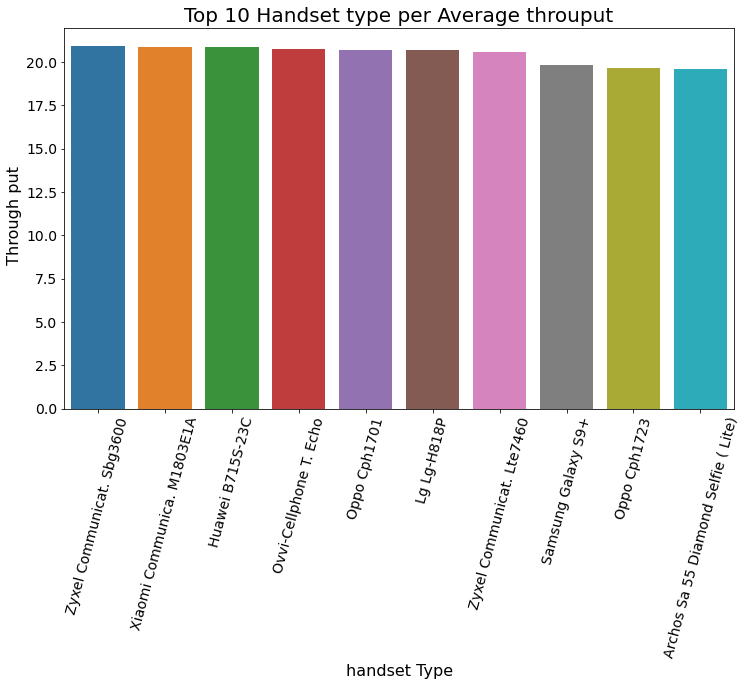

In [54]:
TopTen_HandsetType=HandsetType_Agg.nlargest(10,"avg_bearer_tp_total")

TopTen_HandsetType.nlargest(10, 'avg_bearer_tp_total')
plt.figure(figsize=(12, 7))
sns.barplot(data=TopTen_HandsetType, x=TopTen_HandsetType.index, y=TopTen_HandsetType.avg_bearer_tp_total)
plt.title("Top 10 Handset type per Average throuput", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("handset Type", fontsize=16)
plt.ylabel(" Through put", fontsize=16)

plt.show()


# Average TCP Retransmission count

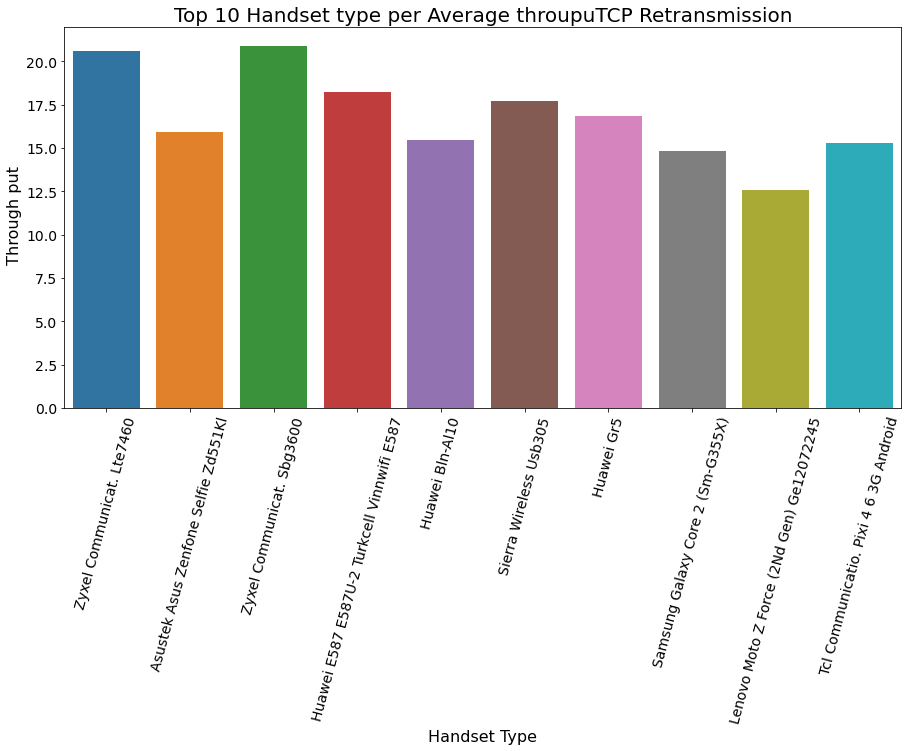

In [55]:
Top_Ten_TCP_RTT = HandsetType_Agg.nlargest(10, 'avg_tcp_retrans_total')
plt.figure(figsize=(15, 7))
sns.barplot(data=Top_Ten_TCP_RTT, x=Top_Ten_TCP_RTT.index, y=Top_Ten_TCP_RTT.avg_bearer_tp_total)
plt.title("Top 10 Handset type per Average throupuTCP Retransmission", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Handset Type", fontsize=16)
plt.ylabel(" Through put", fontsize=16)

plt.show()

# K-Means Clustering for the above Metrics Using K=3 

In [58]:
# To do there are some -inf and null values that should first be handeled. so apply 
UserExperiance_Df_agg.isnull().sum()

avg_rtt_total          sum         701
avg_bearer_tp_total    sum         414
avg_tcp_retrans_total  sum           0
handset_type           <lambda>      0
avg_tp_total                       414
total_avg_tcp_total                  0
dtype: int64

In [61]:
import numpy as np
User_Experiance = UserExperiance_Df_agg.drop(['handset_type'], axis=1)

In [62]:
User_Experiance.replace([np.inf, -np.inf], np.nan, inplace=True)

In [72]:
# Fill the Missing value with the mean 
User_Experiance = User_Experiance.fillna(User_Experiance.mean())
User_Experiance.head()

,avg_rtt_total,avg_bearer_tp_total,avg_tcp_retrans_total,avg_tp_total,total_avg_tcp_total
,sum,sum,sum,,
msisdn/number,,,,,
3.360100e+10,8.114390,7.274480,23.201031,7.274480,23.201031
3.360100e+10,3.401197,7.803027,23.201031,7.803027,23.201031
3.360100e+10,5.416100,7.763021,23.201031,7.763021,23.201031
3.360101e+10,6.942157,9.102310,16.921539,9.102310,16.921539
3.360101e+10,8.114390,27.135851,49.213729,27.135851,49.213729


In [71]:
User_Experiance.drop("avg_bearer_tp_total", axis=1)
User_Experiance.drop("avg_tcp_retrans_total", axis=1)

,avg_rtt_total,avg_bearer_tp_total,avg_tp_total,total_avg_tcp_total
,sum,sum,,
msisdn/number,,,,
3.360100e+10,8.114390,7.274480,7.274480,23.201031
3.360100e+10,3.401197,7.803027,7.803027,23.201031
3.360100e+10,5.416100,7.763021,7.763021,23.201031
3.360101e+10,6.942157,9.102310,9.102310,16.921539
3.360101e+10,8.114390,27.135851,27.135851,49.213729
...,...,...,...,...
3.379000e+10,6.040255,15.166563,15.166563,20.285299
3.379000e+10,5.318120,8.090709,8.090709,23.201031


In [77]:
# Next Normalize The data 
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
norm = Normalizer()
normalized_user_experience=pd.DataFrame(norm.fit_transform(User_Experiance), columns=['avg_rtt_total',	'avg_tp_total','avg_bearer_tp_total','avg_tcp_retrans_total',	'total_avg_tcp_total'])


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [78]:
#K-Means Clustering using normalized data
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
label = kmeans.fit_predict(normalized_user_experience)
centroids = kmeans.cluster_centers_

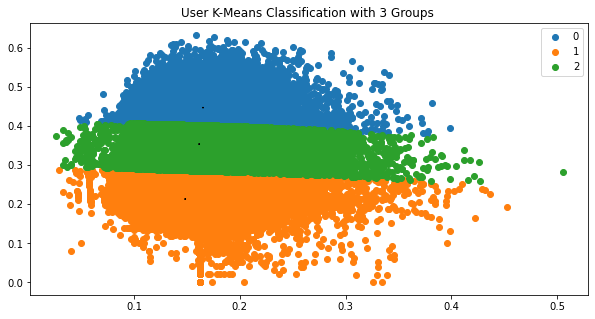

In [80]:
lables_unique = np.unique(label)
#plotting the results:
plt.figure(figsize=(10,5))
plt.title('User K-Means Classification with 3 Groups ')
for i in lables_unique:
    plt.scatter(normalized_user_experience[label == i].iloc[:,0] , normalized_user_experience[label == i].iloc[:,1], marker='o', label = i)
plt.scatter(centroids[:,0] , centroids[:,1],centroids[:,2], marker='x', color = 'black')
plt.legend()
plt.show()

In [ ]:
# As shown in the Cluster figure above those that are grouped in Cluster 0 have higher transmission rate and those at Cluster 
# 3 are the next and Cluster 1 are the least.

In [81]:
u_exp = User_Experiance.copy()
u_exp.insert(0, 'cluster', kmeans.labels_)
u_exp.head(5)

,cluster,avg_rtt_total,avg_bearer_tp_total,avg_tcp_retrans_total,avg_tp_total,total_avg_tcp_total
,,sum,sum,sum,,
msisdn/number,,,,,,
3.360100e+10,1,8.114390,7.274480,23.201031,7.274480,23.201031
3.360100e+10,1,3.401197,7.803027,23.201031,7.803027,23.201031
3.360100e+10,1,5.416100,7.763021,23.201031,7.763021,23.201031
3.360101e+10,2,6.942157,9.102310,16.921539,9.102310,16.921539
3.360101e+10,2,8.114390,27.135851,49.213729,27.135851,49.213729


# over view of Clusters with pie plot

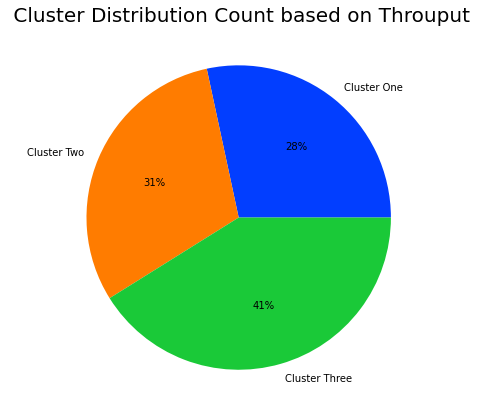

In [84]:
cluster1 = u_exp[u_exp["cluster"]==0]
cluster2 = u_exp[u_exp["cluster"] == 1]
cluster3 = u_exp[u_exp["cluster"] == 2]

data = [cluster1.avg_tp_total.sum(), cluster2.avg_tp_total.sum(), cluster3.avg_tp_total.sum()]
Labels = ['Cluster One', 'Cluster Two', 'Cluster Three']
plt.figure(figsize=(12, 7))
colors = sns.color_palette('bright')
plt.pie(data, labels=Labels, colors=colors, autopct='%.0f%%')
plt.title(" Cluster Distribution Count based on Throuput", size=20)
plt.show()

ValueError: x must be 1D

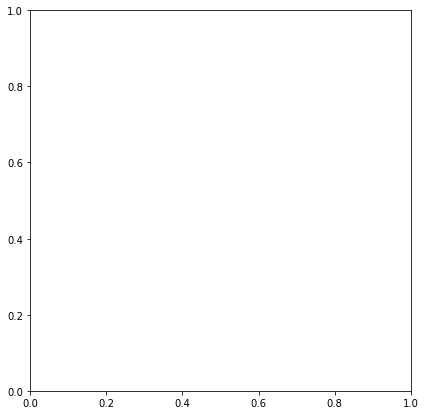

In [85]:
data = [cluster1.avg_rtt_total.sum(), cluster2.avg_rtt_total.sum(), cluster3.avg_rtt_total.sum()]
Labels = ['Cluster One', 'Cluster Two', 'Cluster Three']
plt.figure(figsize=(12, 7))
colors = sns.color_palette('bright')
plt.pie(data, labels=Labels, colors=colors, autopct='%.0f%%')
plt.title(" Cluster Distribution Count based on TCP retransmission", size=20)
plt.show()

In [86]:
u_exp.head()

,cluster,avg_rtt_total,avg_bearer_tp_total,avg_tcp_retrans_total,avg_tp_total,total_avg_tcp_total
,,sum,sum,sum,,
msisdn/number,,,,,,
3.360100e+10,1,8.114390,7.274480,23.201031,7.274480,23.201031
3.360100e+10,1,3.401197,7.803027,23.201031,7.803027,23.201031
3.360100e+10,1,5.416100,7.763021,23.201031,7.763021,23.201031
3.360101e+10,2,6.942157,9.102310,16.921539,9.102310,16.921539
3.360101e+10,2,8.114390,27.135851,49.213729,27.135851,49.213729


# Save Data and Clusters


In [92]:
import pickle

with open("E:\\10xAccademy_Practice\\Week 1\\User Experiance Analysis\\K-Means Model\\UserExperiance_K-Means_Model.pkl", "wb") as f:
    pickle.dump(kmeans, f)


In [91]:
UserExperiance_Df_agg.to_csv('E:\\10xAccademy_Practice\\Week 1\\User Experiance Analysis\\Processed_Data\\Normalized_UserExperiance_data.csv')

In [94]:
u_exp.to_csv('E:\\10xAccademy_Practice\\Week 1\\User Experiance Analysis\\Processed_Data\\UserExperiance_data.csv')